In [34]:
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [35]:
df = pd.read_csv("student data.csv")
df

,CGPA,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills,Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?,Role
0,8.0,NaN,no,excellent,no,no,yes,yes,no,no,no,no,yes,no,no,no,no,no,no,Developer
1,8.8,yes,no,poor,yes,no,NaN,no,no,no,no,yes,NaN,no,no,no,yes,no,no,ML engineer
2,7.9,no,no,poor,no,yes,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,Management
3,8.0,yes,no,medium,yes,no,yes,yes,no,no,yes,no,no,no,no,no,no,no,yes,Developer
4,6.4,no,no,poor,no,yes,yes,no,yes,no,no,no,yes,no,no,no,no,yes,no,Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,8.5,yes,yes,excellent,yes,no,yes,no,yes,no,yes,yes,yes,no,no,no,yes,no,no,Data Analysis
520,8.1,no,NaN,poor,yes,yes,yes,no,yes,no,yes,yes,yes,no,no,no,no,no,no,Computer Analyst
521,8.0,yes,no,poor,yes,no,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,Developer
522,6.4,no,no,excellent,yes,yes,yes,no,yes,NaN,no,no,yes,no,no,no,no,yes,yes,Marketing


In [36]:
# drop rows with missing values
df.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(df.shape)

(492, 20)


In [37]:
dataset = df
dataset = dataset.drop(['CGPA'],axis=1)
dataset.describe()

,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills,Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?,Role
count,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492
unique,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,10
top,no,no,excellent,no,no,yes,no,yes,no,no,no,yes,no,no,no,no,no,no,Developer
freq,261,382,174,249,309,317,338,283,467,360,376,415,350,368,432,405,327,343,131


In [38]:
data = dataset.iloc[:,:-1].values
label = dataset.iloc[:,-1].values
data.shape

(492, 18)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

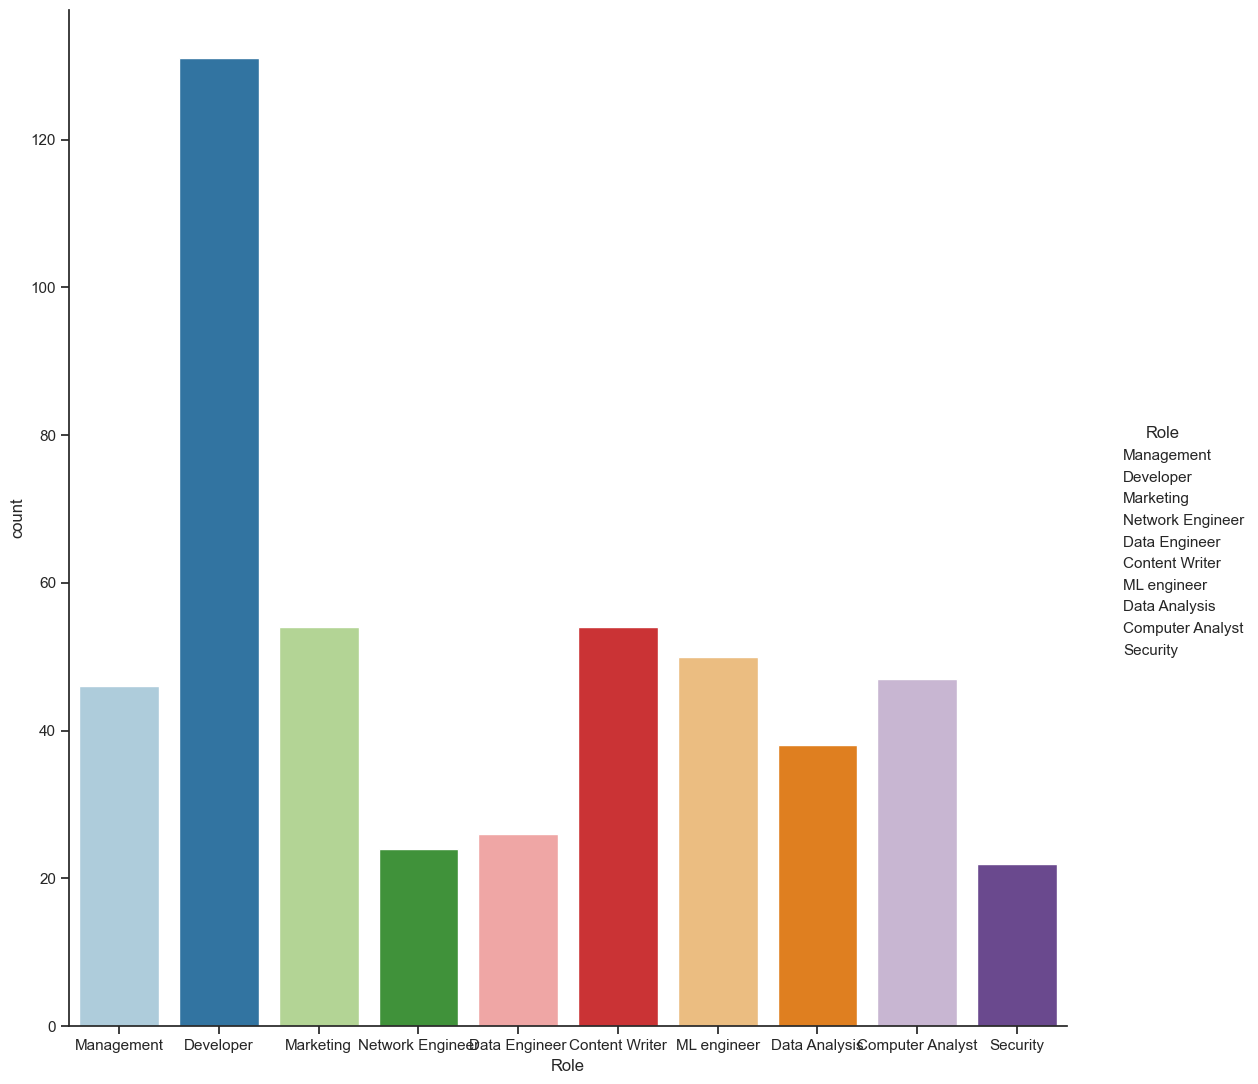

In [40]:
sns.catplot(x="Role", kind="count", palette="Paired",height=11, data=dataset)

# Encoding Data

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [42]:
labelencoder = LabelEncoder()

In [43]:
for i in range(0,18):
    data[:,i] = labelencoder.fit_transform(data[:,i])
data
integer_encoded = data[:,2]
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
a = data[:,0:2]
b = onehot_encoded
c = data[:,3:]
data1 = np.concatenate((a, b), 1)
data1 = np.concatenate((data1, c), 1)
data1

array([[0, 0, 0.0, ..., 0, 0, 0],
       [1, 0, 0.0, ..., 0, 0, 1],
       [0, 0, 0.0, ..., 0, 1, 0],
       ...,
       [1, 0, 0.0, ..., 0, 1, 0],
       [1, 1, 1.0, ..., 1, 0, 0],
       [1, 0, 0.0, ..., 0, 0, 0]], dtype=object)

In [44]:
label = labelencoder.fit_transform(label)
label

# # Fit the encoder on the labels and transform them into integer values
# label = labelencoder.fit_transform(label)

# # Access the mapping between labels and integer values
# label_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))

# # Print the mapping between labels and integers
# print("Label Mapping:")
# for label, label_value in label_mapping.items():
#     print(f"{label}: {label_value}")

array([6, 4, 7, 8, 3, 8, 1, 1, 5, 4, 4, 3, 8, 4, 4, 2, 4, 4, 4, 7, 2, 4,
       5, 1, 5, 7, 1, 4, 4, 2, 6, 0, 9, 4, 6, 7, 9, 3, 2, 8, 0, 5, 4, 7,
       6, 9, 8, 1, 5, 6, 1, 0, 8, 9, 1, 3, 4, 4, 4, 2, 6, 3, 4, 5, 0, 3,
       4, 7, 1, 8, 7, 4, 9, 3, 1, 0, 6, 5, 9, 5, 1, 6, 1, 0, 7, 1, 1, 0,
       9, 4, 3, 6, 0, 4, 7, 6, 0, 1, 1, 8, 4, 2, 6, 3, 4, 5, 0, 5, 7, 1,
       4, 6, 4, 7, 8, 4, 4, 3, 0, 1, 1, 4, 5, 4, 9, 9, 7, 1, 1, 4, 4, 7,
       8, 3, 1, 0, 6, 7, 1, 4, 8, 4, 8, 4, 9, 7, 1, 6, 6, 0, 4, 7, 6, 2,
       0, 4, 8, 5, 1, 5, 3, 2, 5, 7, 1, 4, 1, 4, 7, 6, 2, 0, 4, 9, 5, 1,
       5, 6, 8, 4, 5, 0, 3, 4, 9, 7, 1, 4, 0, 5, 4, 7, 6, 2, 7, 6, 2, 0,
       4, 8, 5, 1, 5, 6, 1, 4, 5, 0, 0, 4, 7, 6, 2, 0, 4, 9, 5, 1, 5, 8,
       2, 3, 4, 9, 2, 8, 4, 5, 0, 0, 5, 7, 1, 4, 2, 6, 4, 8, 4, 4, 7, 4,
       4, 2, 4, 6, 4, 0, 5, 4, 7, 6, 2, 0, 4, 5, 7, 1, 4, 5, 7, 1, 4, 6,
       4, 7, 4, 4, 3, 0, 1, 1, 4, 5, 4, 9, 3, 4, 7, 4, 4, 2, 4, 6, 5, 7,
       7, 1, 4, 6, 4, 3, 2, 3, 4, 4, 9, 3, 4, 5, 0,

In [45]:
list(dataset.columns)

['Did you do webdev during college time ?',
 'Are you good at Data analysis ?',
 'reading and writing skills',
 'Are you a tech person ?',
 'Were you in a non tech society ?',
 'Are you good at coding ?',
 'Have you developed mobile apps ?',
 'Are you good at communication ?',
 'Do you have specialization in security',
 'Have you ever handled large databases ?',
 'Do you have knowlege of statistics and data science?',
 'Are you proficient in English ?',
 'Have you ever managed some event?',
 'Do you write technical blogs ?',
 'Are you into marketing ?',
 'Are you a ML expert ?',
 'Do you have a lot of connections ?',
 'Have you ever built live project ?',
 'Role']

In [46]:
X = pd.DataFrame(data1,columns=['Did you do webdev during college time ?',
 'Are you good at Data analysis ?',
 'reading and writing skills(exelent)',
 'reading and writing skills(medium)',
 'reading and writing skills(poor)',                               
 'Are you a tech person ?',
 'Were you in a non tech society ?',
 'Are you good at coding ?',
 'Have you developed mobile apps ?',
 'Are you good at communication ?',
 'Do you have specialization in security ',
 'Have you ever handled large databases ?',
 'Do you have knowlege of statistics and data science?',
 'Are you proficient in English ?',
 'Have you ever managed some event?',
 'Do you write technical blogs ?',
 'Are you into marketing ?',
 'Are you a ML expert ?',
 'Do you have a lot of connections ?',
 'Have you ever built live project ?'])

In [47]:
print(X.shape)
X.head(80)

(492, 20)


,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills(exelent),reading and writing skills(medium),reading and writing skills(poor),Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?
0,0,0,0.0,0.0,1.0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,1,0,0.0,1.0,0.0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0.0,0.0,1.0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0.0,0.0,1.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0.0,0.0,1.0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,0.0,1.0,0.0,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0
76,0,0,1.0,0.0,0.0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
77,0,1,0.0,0.0,1.0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1
78,1,0,1.0,0.0,0.0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0


In [48]:
y = pd.DataFrame(label,columns=["Role"])
y.head()

,Role
0,6
1,4
2,7
3,8
4,3


# Gini Criterion

In [49]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state= 23) 
X

,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills(exelent),reading and writing skills(medium),reading and writing skills(poor),Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?
0,0,0,0.0,0.0,1.0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,1,0,0.0,1.0,0.0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0.0,0.0,1.0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0.0,0.0,1.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0.0,0.0,1.0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0,0,0.0,1.0,0.0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0
488,1,0,1.0,0.0,0.0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,1
489,1,0,0.0,1.0,0.0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0
490,1,1,1.0,0.0,0.0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,0


In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [52]:
print("max_depth     accuracy")
for x in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth = x,criterion = "gini")
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    print(x,"          ",accuracy)

max_depth     accuracy
1            0.3581081081081081
2            0.4594594594594595
3            0.527027027027027
4            0.6351351351351351
5            0.75
6            0.8108108108108109
7            0.8175675675675675
8            0.8175675675675675
9            0.7972972972972973
10            0.8040540540540541


In [53]:
clf_gini = tree.DecisionTreeClassifier(max_depth = 8,criterion = "gini")
clf_gini = clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)

In [54]:
cm = confusion_matrix(y_test,y_pred)
accuracy_gini = accuracy_score(y_test,y_pred)
print("confusion matrix")
print(cm)
print("Accuracy = ",accuracy_gini)

confusion matrix
[[ 6  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  2  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0 37  1  1  1  1  0]
 [ 0  4  1  0  0 10  1  0  0  0]
 [ 0  0  1  0  0  1  7  3  0  0]
 [ 1  0  0  0  0  0  0 16  0  0]
 [ 0  1  1  0  0  1  1  0  1  1]
 [ 1  2  0  0  0  0  0  0  1  4]]
Accuracy =  0.8175675675675675


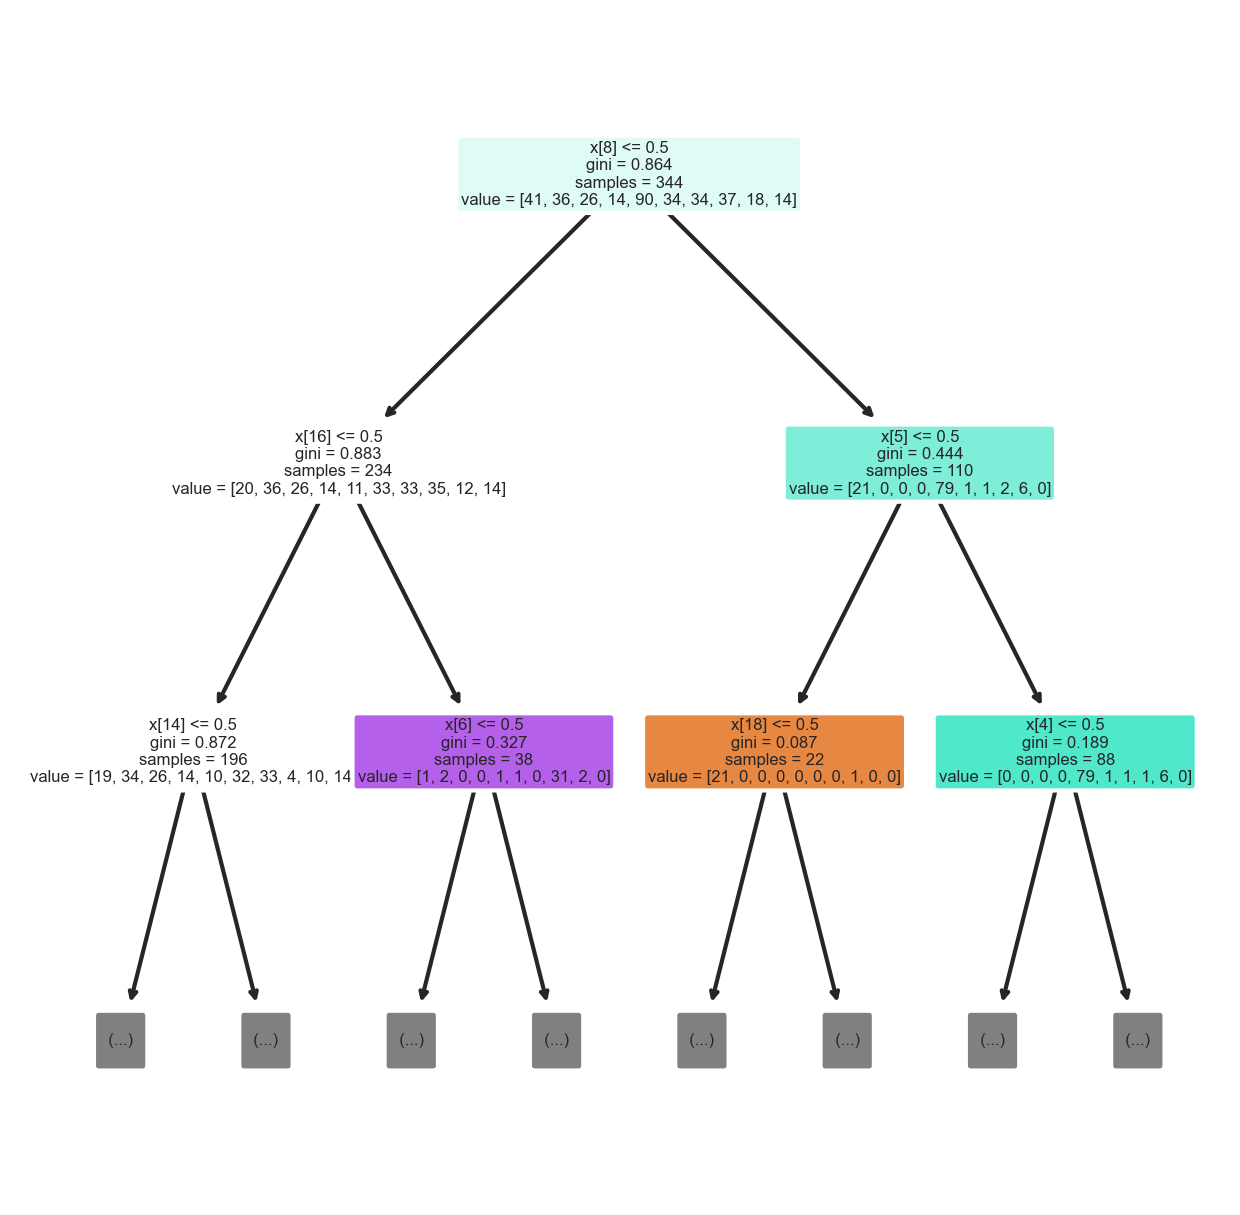

In [55]:
# fig = plt.figure(figsize=(20,25))
# _ = tree.plot_tree(clf, filled=True)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf,filled=True,fontsize=4,max_depth=2,rounded=True);
# fig.savefig('imagename.png')

# Information Gain Method

In [56]:
print("max_depth     accuracy")
for x in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth = x,criterion = "entropy")
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    print(x,"          ",accuracy)

max_depth     accuracy
1            0.38513513513513514
2            0.5540540540540541
3            0.7567567567567568
4            0.8108108108108109
5            0.8581081081081081
6            0.8513513513513513
7            0.8040540540540541
8            0.7905405405405406
9            0.7837837837837838
10            0.7905405405405406


In [57]:
clf_ent = tree.DecisionTreeClassifier(max_depth = 5,criterion = "entropy")
clf_ent = clf_ent.fit(X_train, y_train)
y_pred = clf_ent.predict(X_test)

In [58]:
cm_ent = confusion_matrix(y_test,y_pred)
accuracy_ent = accuracy_score(y_test,y_pred)
print("confusion matrix")
print(cm_ent)
print("Accuracy = ",accuracy_ent)

confusion matrix
[[ 6  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  3  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0]
 [ 0  0  1  0 39  1  0  0  0  0]
 [ 0  2  1  0  0 12  1  0  0  0]
 [ 0  0  1  0  0  0 10  1  0  0]
 [ 1  0  0  0  0  0  0 16  0  0]
 [ 0  1  1  0  1  1  1  0  0  1]
 [ 1  1  1  0  0  0  0  0  0  5]]
Accuracy =  0.8581081081081081


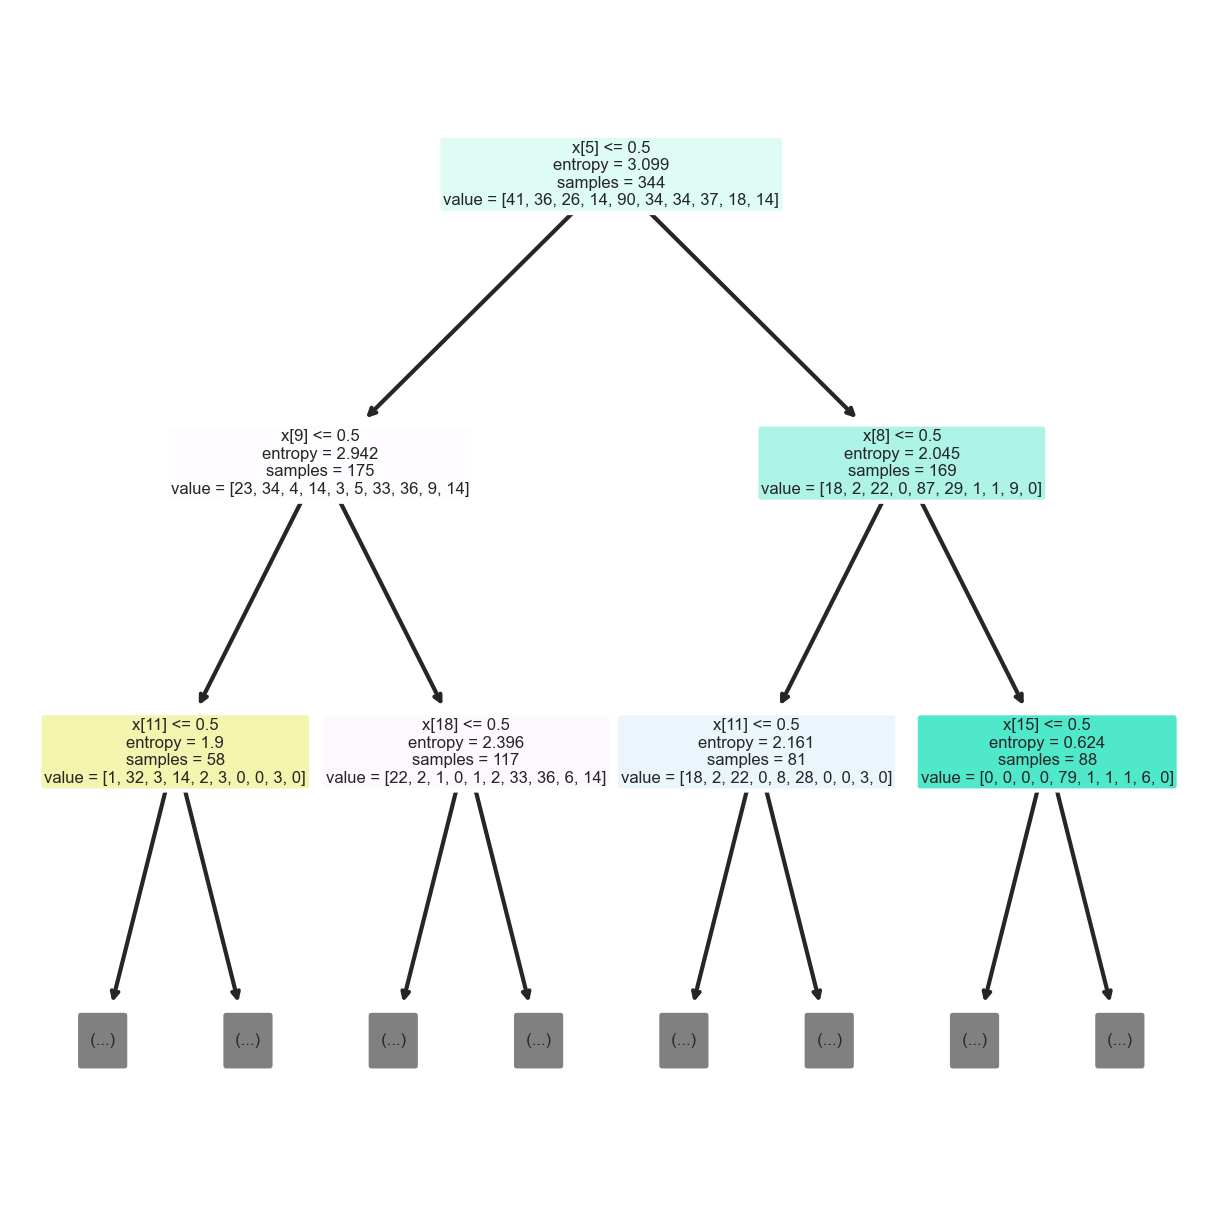

In [59]:
# fig = plt.figure(figsize=(20,25))
# _ = tree.plot_tree(clf, filled=True)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf_ent,filled=True,fontsize=4,max_depth=2,rounded=True);
# fig.savefig('imagename.png')

# SVM

In [60]:
from sklearn import svm

In [61]:
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

SVC()

In [62]:
svm_y_pred = clf_svm.predict(X_test)

In [63]:
cm_svm = confusion_matrix(y_test,svm_y_pred)
accuracy_svm = accuracy_score(y_test,svm_y_pred)

In [64]:
print("confusion matrix")
print(cm_svm)
print("Accuracy = ",accuracy_svm)

confusion matrix
[[ 6  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  2  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 1  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 39  1  0  1  0  0]
 [ 0  2  0  0  0 13  1  0  0  0]
 [ 0  0  0  0  0  0 10  1  1  0]
 [ 1  0  0  0  0  0  0 16  0  0]
 [ 0  1  1  0  1  1  1  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  7]]
Accuracy =  0.8783783783783784


# Accuracy Comparison

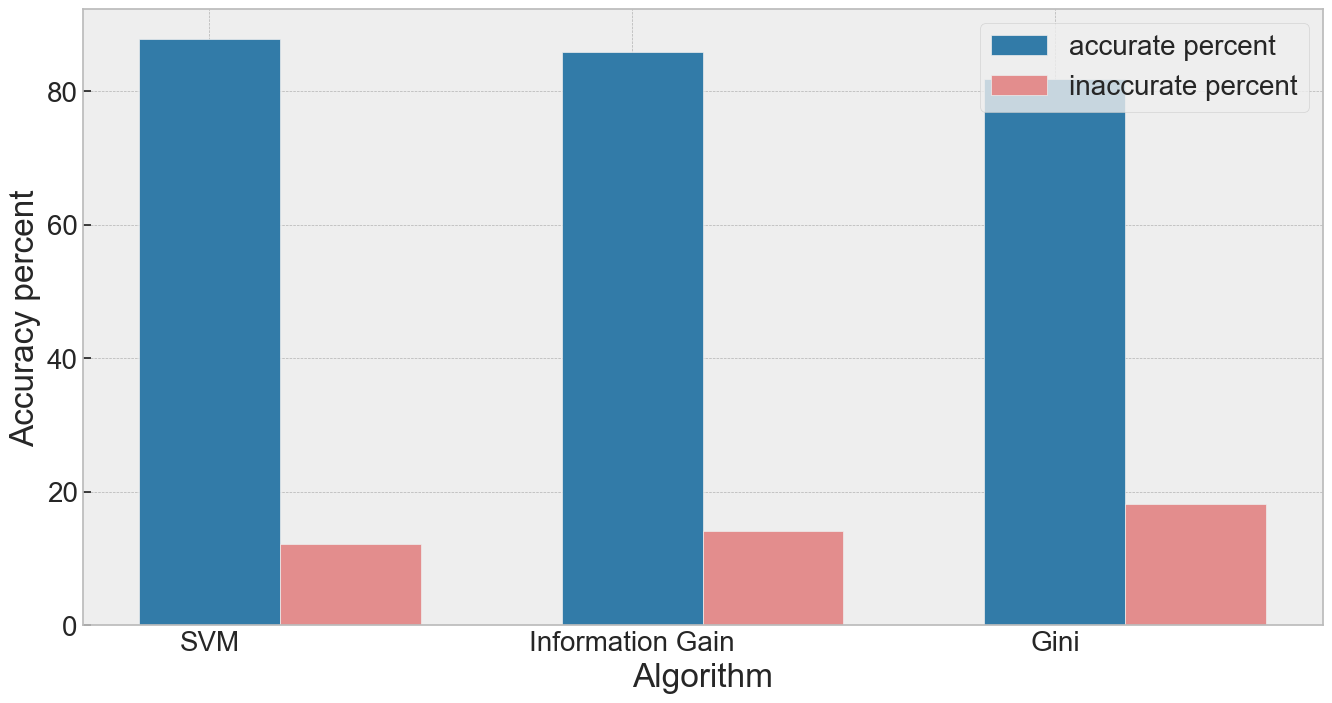

In [65]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use("bmh")
x_co = np.array([1,2,3])*3
plt.bar(x_co-0.5,[accuracy_svm*100,accuracy_ent*100,accuracy_gini*100],width = 1,label = "accurate percent",color = "#327ba8",tick_label = ["SVM","Information Gain","Gini"])
plt.bar(x_co+0.5,[100-accuracy_svm*100,100-accuracy_ent*100,100-accuracy_gini*100],width = 1,label = "inaccurate percent",color="#e38d8d")
# plt.title("THis is Title")
fig = plt.gcf()
fig.set_size_inches(16, 8)
# fig.savefig('test2png.png', dpi=100)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy percent")
plt.legend()
plt.show()


In [66]:
user_input = [0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1]
user_input = np.array(user_input).reshape(1, -1)
predicted_job = clf_svm.predict(user_input)
print(f"Recommended Job Role: {predicted_job[0]}")

Recommended Job Role: 5


## Save the model

In [67]:
import pickle
# open a file, where you ant to store the data
file = open('career_svm.pkl', 'wb')

# dump information to that file
pickle.dump(clf_svm, file)

In [69]:
model = open('C:/Users/riach/Projects/career_recommendation_model/career_svm.pkl','rb')
svm_model = pickle.load(model)